In [1]:
# Ejemplo de clasificación de imagenes con TF
# Se introduce el dataset fashion-mnist como dataset de trabajo.
# Se introducen las redes densas (Dense, Full Connected)

In [2]:
import tensorflow as tf
import keras
import os
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt

load_dotenv()

print(f'tensorflow version: {tf.__version__}')
print(f'numpy version: {np.__version__}')
print(f'keras version: {keras.__version__}')

2024-10-11 07:59:24.736546: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-11 07:59:24.742463: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-11 07:59:24.801754: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-11 07:59:24.857088: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-11 07:59:24.898602: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

tensorflow version: 2.17.0
numpy version: 1.26.4
keras version: 3.6.0


In [3]:
# --------------------------------
# Load
# --------------------------------
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

In [4]:
# 60k imagenes de 28x28 pixeles
x_train.shape

(60000, 28, 28)

Index: 2
Label: 0
[[  0   0   0   0   0   0   0   0   0  22 118  24   0   0   0   0   0  48
   88   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12 100 212 205 185 179 173 186 193 221
  142  85   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  85  76 199 225 248 255 238 226 157
   68  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  91  69  91 201 218 225 209 158  61
   93  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  79  89  61  59  87 108  75  56  76
   97  73   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  75  89  80  80  67  63  73  83  80
   96  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77  88  77  80  83  83  83  83  81
   95  76   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  89  96  80  83  81  84  85  85  85
   97  84   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  93  97 

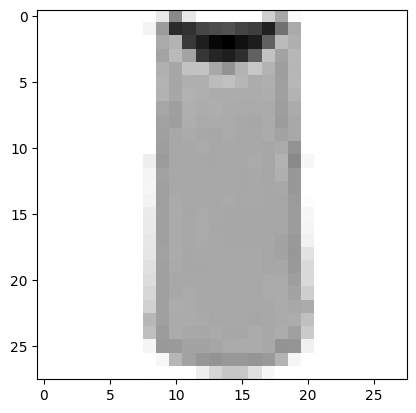

In [5]:
# --------------------------------
# Show
# --------------------------------
INDEX = np.random.randint(100)

# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot
print(f'Index: {INDEX}')
print(f'Label: {y_train[INDEX]}')
print(x_train[INDEX])
plt.imshow(x_train[INDEX], cmap='binary')
plt.show()

In [6]:
# --------------------------------
# Preprocessing
# --------------------------------

# divide by 255 to normalize
x_train, x_test = x_train/255, x_test/255

In [7]:
# --------------------------------
# Define Model
# --------------------------------

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile
model.compile(optimizer=tf._optimizers.Adam(),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# sparse_categorical_crossentropy:
# 1. labels are integers (not one-hot encoded)
# 2. Typical for multiclass classification
# 3. Based on cross-entropy. 
# 4. Como softmax genera probabilidades, cross-entropy calcula, para la probabilidad predicha de la true-label segun trainning-labels
#    loss = -log(y_c). Con esto, si la prob. fuera 1, loss = 0. Penaliza bajas probabilidades para la clase verdadera. 

/home/gonzalo/.virtualenvs/genv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# --------------------------------
# Train
# --------------------------------
print(f'\nMODEL TRAINING:')
model.fit(x_train, y_train, epochs=10)


MODEL TRAINING:
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7788 - loss: 0.6388
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8602 - loss: 0.3886
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8765 - loss: 0.3442
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8836 - loss: 0.3200
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8903 - loss: 0.2955
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8983 - loss: 0.2771
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9022 - loss: 0.2658
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9057 - loss: 0.2549
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9065 - loss: 0.2501
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9103 - loss: 0.2397


In [30]:
# --------------------------------
# EVALUATION
# --------------------------------
print(f'\nMODEL EVALUATION:')
eval_results = model.evaluate(x_test, y_test, return_dict=True)
print(f'LOSS: {eval_results["loss"]}')
print(f'ACCURACY: {eval_results["accuracy"]}')


MODEL EVALUATION:
 70/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8878 - loss: 0.3455